CPU times: total: 0 ns
Wall time: 1e+03 μs
CPU times: total: 15.6 ms
Wall time: 47.5 ms
Columns in combined dataframe: Index(['F_mod_sev_ad', 'F_sev_ad', 'F_mod_sev_child', 'F_sev_child',
       'F_mod_sev_tot', 'F_sev_tot'],
      dtype='object')
                 F_mod_sev_ad  F_sev_ad  F_mod_sev_child  F_sev_child  \
year                                                                    
KGZ_2014             0.205101  0.045623         0.231556     0.052769   
KGZ_2015             0.220841  0.046532         0.248678     0.056905   
KGZ_2016             0.198151  0.038837         0.222567     0.044893   
KGZ_2017             0.199979  0.039710         0.241787     0.040836   
Kazakhstan_2014      0.080557  0.007436         0.085143     0.006571   

                 F_mod_sev_tot  F_sev_tot  
year                                       
KGZ_2014              0.214715   0.048220  
KGZ_2015              0.231048   0.050335  
KGZ_2016              0.208191   0.041327  
KGZ_2017            

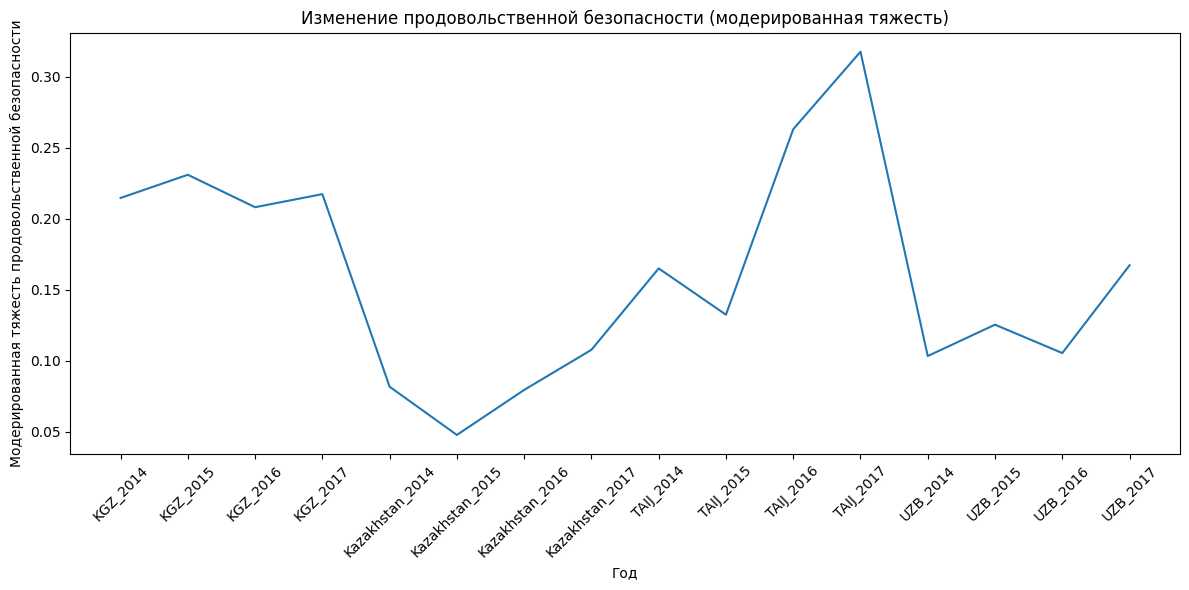

In [5]:
# Импорт необходимых библиотек
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

# Путь к вашему файлу
file_path = r"C:\Users\BG\Desktop\СРСП week 6. Иванников Артём. БИ2209\aggregated_results.xlsx"

# Используем pandas для загрузки данных
df_pandas = pd.read_excel(file_path)

# Используем pandas для загрузки данных, а затем преобразуем в dask
df_dask = dd.from_pandas(df_pandas, npartitions=4)

# Анализ для каждой страны отдельно (pandas)
def analyze_pandas(df):
    countries = df['country'].unique()
    trends = {}
    
    for country in countries:
        country_data = df[df['country'] == country]
        # Вычисляем средние значения только для числовых столбцов
        trends[country] = country_data.mean(numeric_only=True)
    
    return trends

# Анализ для каждой страны отдельно (dask)
def analyze_dask(df):
    countries = df['country'].unique().compute()
    trends = {}
    
    for country in countries:
        country_data = df[df['country'] == country].compute()
        # Вычисляем средние значения только для числовых столбцов
        trends[country] = country_data.mean(numeric_only=True)
    
    return trends

# Объединение данных по годам, учитывая только числовые столбцы
def combine_data(df):
    df_combined = df.groupby('year').mean(numeric_only=True)
    return df_combined

# Выполним анализ с помощью pandas
%time trends_pandas = analyze_pandas(df_pandas)

# Выполним анализ с помощью dask
%time trends_dask = analyze_dask(df_dask)

# Объединение с pandas
df_combined_pandas = combine_data(df_pandas)

# Проверка имен столбцов
print("Columns in combined dataframe:", df_combined_pandas.columns)

# Проверка первых нескольких строк датафрейма
print(df_combined_pandas.head())

# Объединение с dask
df_combined_dask = combine_data(df_dask.compute())

# Визуализация трендов с использованием matplotlib
plt.figure(figsize=(12, 6))  # Увеличиваем размер графика

# Используем правильное имя столбца для y
sns.lineplot(data=df_combined_pandas, x='year', y='F_mod_sev_tot')  # Замените на правильное имя столбца
plt.title('Изменение продовольственной безопасности (модерированная тяжесть)')
plt.xlabel('Год')
plt.ylabel('Модерированная тяжесть продовольственной безопасности')

# Поворачиваем метки на оси X
plt.xticks(rotation=45, fontsize=10)  # Повернуть метки на 45 градусов и изменить размер шрифта

plt.tight_layout()  # Автоматическая подгонка графика
plt.show()
